In [ ]:
# pandas 라이브러리 로드 
import pandas as pd

# 경로
1. 절대 경로
    - 절대적인 주소 값
    - 컴퓨터의 환경이 변하더라도 같은 위치를 지정
    - ex) c:/users/admin/document/a.txt, https://www.google.com
2. 상대 경로
    - 상대적인 주소 값
    - 환경이 변함에 따라 위치도 변화한다. 
    - ./ : 현재 파일의 경로
    - ../ : 현재 경로에서 상위 폴더로 이동
    - 폴더명/ : 하위폴더로 이동
    - ex) 현재 경로에서 상위로 이동 sample_web 하위 폴더로 이동
    - (../sample_web/app.py)

In [ ]:
# csv라는 하위폴더로 이동 -> corona.csv 파일 로드 
# 상대경로
corona = pd.read_csv("./csv/corona.csv")
# 절대경로
# corona2 = pd.read_csv("D:\python\pandas\csv\corona.csv")

In [ ]:
corona

In [ ]:
# 특정한 행이나 열을 삭제 
# drop( {기준이 되는 조건}, axis=(0('rows') | 1('columns')) , inplace = bool )
# axis 매개변수 : 0이나 1, rows나 columns 행을 지울것인가 열을 지울것인가 지정
# inplace 매개변수 : 기본값은 False, True로 변경하면 기준이되는 데이터프레임을 변경
# pandas 안에 있는 DataFrame이라는 class 안에 존재하는 함수
# corona = corona.drop( ['Unnamed: 0'], axis = 1 )
corona.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [ ]:
corona.drop([0, 1, 4], axis=0)

In [ ]:
# 복사본 데이터를 생성
df = corona.copy()

In [ ]:

df.drop([0], axis=0, inplace=True)

In [ ]:
df.head(3)

In [ ]:
corona.head(3)

In [ ]:
# 데이터프레임에 컬럼의 이름을 변경

df.columns = ["등록일시", '총사망자', '총확진자', '게시글번호', '기준일', '기준시간', 
              '수정일시', '누적의심자', '누적확진자']

In [ ]:
df.head(3)

In [ ]:
# 특정한 컬럼을 기준으로 차순 정렬
# sort_values( {기준이 되는 컬럼}, ascending = bool, inplace = bool )
# ascending 매개변수 : 기본값은 True(오름차순), False로 변경하면 내림차순 정렬

# 등록일시를 기준으로 오름차순 정렬 데이터프레임을 변경
df = df.sort_values(['등록일시'], ascending=True)

In [ ]:
df.head(3)

In [ ]:
# 인덱스를 초기화
# reset_index(drop = bool, inplace = bool)
# drop 매개변수 : 기본값은 False, True 변경하면 기존의 인덱스를 삭제
df.reset_index(drop = True, inplace=True)
# df.reset_index().drop(['index'], axis=1)

In [ ]:
df.tail()

In [ ]:
# 데이터프레임의 정보를 출력하는 함수
df.info()

In [ ]:
# is함수
# 특정한 데이터가 존재하는지 확인하는 함수
# 결측치의 유무 판단하는 함수 
# isna() : 데이터가 결측치인 경우 True, 결측치가 아니라면 False
# sum(axis = (0 | 1))
# axis 매개변수 : 0, rows -> 행들의 합계, 1, columns -> 열들의 합계
df.isna().sum()

In [ ]:
# 결측치를 특정한 데이터로 치환
# fillna({특정한 값})
# 해당하는 값으로 결측치를 치환
# fillna(method = ?)
# method 매개변수 : 
#   'ffill' -> 전의 데이터의 값으로 대체
#   'bfill' -> 후의 데이터의 값으로 대체
# df에서 누적의심자 컬럼의 결측치를 ffill로 치환
df['누적의심자'] = df['누적의심자'].fillna(method='ffill')

In [ ]:
df.isna().sum()

In [ ]:
df.head(2)

In [ ]:
# 특정한 컬럼의 이름을 변경
# rename(index = {'before' : 'after'}, columns = {'before' : 'after'}, inplace = bool)
df.rename(columns={'누적확진자' : '누적확진율'}, inplace=True)

In [ ]:
# shift(n)
# n만큼 행을 이동한다. 
# 기본값은 1
# 전날의 사망자의 데이터
df['총사망자'].shift(1).fillna(0)

In [ ]:
# 일일사망자 = 오늘의 총사망자 - 전날의 총사망자
df['일일사망자'] = (df['총사망자'] - df['총사망자'].shift()).fillna(0)

In [ ]:
df.head(1)

In [ ]:
# 스리즈형태에서 전이나 후의 데이터와의 차이를 출력하는 함수
# diff(n)
# n의 기본값은 1
# 현재 행의 데이터와 n만큼 이동한 데이터의 차이를 출력
df['일일확진자'] = df['총확진자'].diff(1).fillna(0)

In [ ]:
df.head(1)

In [ ]:
dict_data = {
    'name' : 'test', 
    'age' : 20
}
print(dict_data)

In [ ]:
# dict 데이터에서 test만 출력하려면?
dict_data['name']

In [ ]:
# dict 데이터에서 name의 value를 test2로 변경하려면?
dict_data['name'] = 'test2'
dict_data

In [ ]:
# dict 데이터에서 새로운 key : value를 추가한다. 
# phone : 01012345678
dict_data['phone'] = '01012345678'
dict_data

# 필터
1. loc[인덱스의 조건, 컬럼의 조건]
    - 특정한 인덱스의 조건에 일치하는 데이터를 출력
    - 특정한 컬럼의 조건에 일치하는 데이터를 출력
2. iloc[인덱스의 위치, 컬럼의 위치]
    - 특정한 인덱스의 위치에 데이터를 출력
    - 특정한 컬럼의 위치에 데이터를 출력

In [ ]:
# 복사본 생성
df2 = df.copy()

In [ ]:
df2.drop([0, 2], axis=0, inplace=True)
df2

In [ ]:
# loc[]를 사용한 필터
df2.loc[0:6]

In [ ]:
df2.loc[ : ,"기준일" : '일일확진자']

In [ ]:
df2.loc[1:4, '기준일' : '수정일시']

In [ ]:
df2.loc[df2['수정일시'].isna()]

In [ ]:
df2.iloc[0:3]

In [ ]:
df2.iloc[:, 1:4]

In [ ]:
# 일일사망자, 일일확진자 음수인 데이터가 존재하는가?
(df['일일확진자'] < 0).value_counts()

In [ ]:
df.loc[df['일일확진자'] < 0]

In [ ]:
df.loc[444:448]

In [ ]:
# 2021-05-31일 데이터가 입력에 오류 확인
# 인덱스가 445번의 등록일시 라는 데이터를 2021-05-31 00:00:00.000 로 변경

# 인덱스가 445이고(인덱스의 조건) 등록일시 컬럼의(컬럼의 조건) 데이터를 출력
df.loc[445, '등록일시'] = "2021-05-31 00:00:00.000"

In [ ]:
df.values

In [ ]:
df.loc[444:448]

In [ ]:
# df를 등록일시를 기준으로 오름차순 정렬
df.sort_values(['등록일시'], ascending=True, inplace=True)
# df의 인덱스를 초기화하고 기존의 인덱스를 제거 
df.reset_index(drop=True, inplace=True)
# '일일확진자', '일일사망자' 컬럼의 데이터를 수정 
df['일일확진자'] = (df['총확진자'] - df['총확진자'].shift()).fillna(0)
df['일일사망자'] = df['총사망자'].diff().fillna(0)
# '일일확진자' 컬럼의 데이터의 음수가 존재하는가?
df.loc[df['일일확진자'] < 0]

In [ ]:
# 시간 데이터 -> 시계열 데이터
# 시계열 데이터로 변환 시켜주는 함수
# to_datetime({스리즈 형태의 데이터}, format = {데이터의 형태})
# format 매개변수 : 인자값으로 사용하는 입력 데이터가 어떠한 형태로 구성이 되어있는가를 설명
# pandas 내부에 있는 함수
# %Y : 4자리의 년도수
# %y : 2자리의 년도수
# %m : 월
# %d : 일
# %H : 시
# %M : 분
# #S : 초

# 등록일시 데이터를 시계열로 변환
df['등록일시'] = pd.to_datetime(df['등록일시'])

In [ ]:
df.info()

In [ ]:
# 기준일 데이터를 시계열로 변환
df['기준일'] = pd.to_datetime(df['기준일'], format='%Y%m%d')

In [ ]:
df.info()

In [ ]:
# 시간 데이터에서 요일을 추출
df['요일'] = df['등록일시'].dt.weekday

In [ ]:
df.head()

In [75]:
# map( {함수명}, {자료형데이터} )

def change(x):
    result = x ** 2
    return result

_list = [1,2,3,4]
# _list의 원소의 값들을 제곱 [1, 4, 9, 16]

# 새로운 비어있는 리스트를 생성
result = []

# 반복문을 이용하여 함수를 호출
for i in _list:
    result.append( change(i) )

result


[1, 4, 9, 16]

In [77]:
list(map(change, _list))

[1, 4, 9, 16]

In [79]:
# apply({함수명})
# 스리즈 형태의 데이터를 일반 함수에 대입하여 새로운 스리즈 형태의 데이터를 생성

# 일반 함수
def change(x):
    # x가 0이라면 '월'
    if x == 0:
        result = '월'
    elif x == 1:
        result = '화'
    elif x == 2:
        result = '수'
    elif x == 3:
        result = '목'
    elif x == 4:
        result = '금'
    elif x == 5:
        result = '토'
    else :
        result = '일'
    return  result


In [80]:
df['요일'].apply(change)

0      화
1      수
2      목
3      금
4      토
      ..
814    금
815    토
816    일
817    월
818    화
Name: 요일, Length: 819, dtype: object

In [81]:
# lambda 함수
# 함수를 선언함과 동시에 호출
_list = [1, 3, 6, 8]

list(
    map(
        lambda x : x ** 2, 
        _list
    )
)

[1, 9, 36, 64]

In [83]:
def change2(x):
    # x를 위치값으로 생각 자료형 데이터에서 해당하는 위치의 데이터를 출력
    week_list = ['월', '화', '수', '목', '금', '토', '일']

    return week_list[x]

df['요일'] = df['요일'].apply(change2)

In [84]:
df.head(3)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자,요일
0,2020-03-10,54,7513,51,2020-03-10,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,화
1,2020-03-11,60,7755,52,2020-03-11,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0,242.0,수
2,2020-03-12,66,7869,53,2020-03-12,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0,114.0,목


In [ ]:
# 데이터를 그룹화하여 연산
# 그룹화 함수
# groupby({특정한 컬럼}).연산함수
# 연산함수 : 최소, 최대, 합계, 평균, 표준편차, 개수
df[ ['요일', '일일사망자', '일일확진자'] ].groupby(['요일']).mean()

In [90]:
group_data = \
    df[ ['요일', '일일사망자', '일일확진자'] ].groupby(['요일']).agg(['mean', 'sum'])

In [92]:
group_data['일일사망자']['mean']

요일
금    32.897436
목    34.206897
수    28.341880
월    24.076923
일    28.504274
토    32.504274
화    26.754237
Name: mean, dtype: float64

In [93]:
group_data

일일사망자                 일일확진자           
         mean     sum          mean        sum
요일                                            
금   32.897436  3849.0  22542.854701  2637514.0
목   34.206897  3968.0  25776.267241  2990047.0
수   28.341880  3316.0  27111.102564  3171999.0
월   24.076923  2817.0  14739.230769  1724490.0
일   28.504274  3335.0  20801.384615  2433762.0
토   32.504274  3803.0  22555.948718  2639046.0
화   26.754237  3157.0  21783.652542  2570471.0

In [94]:
# 그래프로 시각화
# matplotlib 라이브러리 로드 
from matplotlib import pyplot as plt

In [97]:
import platform

In [98]:
# 한글 깨짐 방지 
# matplot에 있는 폰트의 설정을 변경

# os 가 mac 인 경우
if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else :
    plt.rc('font', family = 'Malgun Gothic')

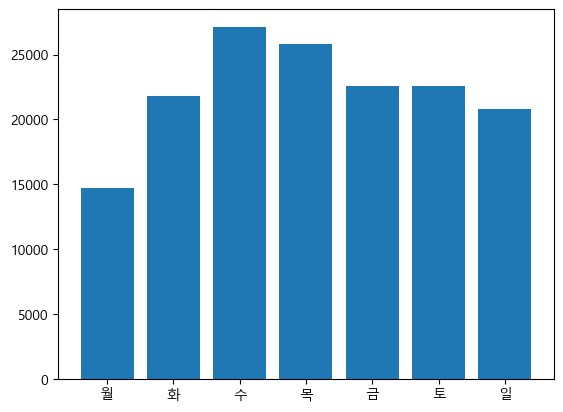

In [104]:
# 바형 그래프
# bar({x축데이터}, {y축데이터}, option)
# 요일별 일일확진자의 평균 값을 바형 그래프 표기
x = group_data.index
y = group_data['일일확진자']['mean']

plt.bar(x, y)
plt.show()

In [103]:
# 요일별로 데이터프레임의 순서를 변경
week_order = ['월', '화', '수', '목', '금', '토', '일']
group_data = group_data.loc[week_order]

In [ ]:
# 일일확진자의 요일별 평균값 그래프와 
# 일일사망자의 요일별 합계값 그래프를 
# subplot을 이용하여 시각화

x = group_data.index
y1 = group_data['일일확진자']['mean']
y2 = group_data['일일사망자']['sum']

# 그래프가 그려지는 영역의 사이즈를 지정 
plt.figure(figsize=(14, 8))
# 영역을 이분할하여 첫번째 영역을 선택
plt.subplot(2, 1, 1)
# 그래프 시각화
plt.bar(x, y1, color=['red', 'yellow'])
# x축의 이름
plt.xlabel('요일')
# y축의 이름
plt.ylabel('일일확진자 평균')
# 그래프의 제목
plt.title('요일별 일일 확진자')
# 2개의 영역중 두번째 영역을 선택
plt.subplot(2, 1, 2)
# 그래프 시각화
plt.bar(x, y2)

plt.show()

In [111]:
# pivot_table()
# 그룹화 연산
pivot_data = pd.pivot_table(
    df, 
    index= ['요일'], 
    values= ['일일사망자', '일일확진자'], 
    aggfunc= ['mean']
)

<Axes: xlabel='요일'>

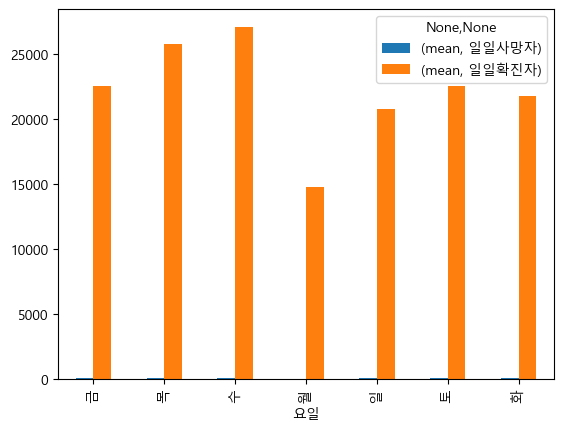

In [112]:
# 단순하게 시각화
pivot_data.plot.bar()

In [121]:
# 데이터 전처리 과정이 완료된 후 해당하는 데이터프레임을 파일로 저장
# csv 파일로 저장
# 데이터의 형태를 csv로 변환
# to_csv({파일이 저장되는 경로와 파일의 이름}, encoding=?)
# encoding 매개변수 : 데이터를 어떤 엔진을 인코딩을 할것인가
# 기본값은 UTF-8 -> 한글이 종종 깨지는 경우가 발생
# 한글이 깨지는 경우 'CP949', 'EUC-KR'로 변경
df.to_csv("./corona.csv", encoding='cp949', index=False)

In [118]:
df.to_excel('./corona.xlsx')

In [ ]:
!pip install openpyxl

In [122]:
pd.read_csv("./corona.csv", encoding='cp949')

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자,요일
0,2020-03-10 00:00:00.000,54,7513,51,2020-03-10,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,화
1,2020-03-11 00:00:00.000,60,7755,52,2020-03-11,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0,242.0,수
2,2020-03-12 00:00:00.000,66,7869,53,2020-03-12,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0,114.0,목
3,2020-03-13 00:00:00.000,67,7979,54,2020-03-13,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1.0,110.0,금
4,2020-03-14 00:00:00.000,72,8086,55,2020-03-14,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5.0,107.0,토
...,...,...,...,...,...,...,...,...,...,...,...,...
814,2022-06-03 09:08:18.729,24229,18141775,899,2022-06-03,00:00,2022-06-08 09:11:38.938,21518073.0,NaN,17.0,12539.0,금
815,2022-06-04 08:56:49.219,24238,18153814,900,2022-06-04,00:00,2022-06-08 09:11:26.303,21518073.0,NaN,9.0,12039.0,토
816,2022-06-05 08:53:19.426,24258,18163648,901,2022-06-05,00:00,2022-06-08 09:11:04.758,21518073.0,NaN,20.0,9834.0,일
817,2022-06-06 09:00:06.734,24279,18168670,902,2022-06-06,00:00,2022-06-08 09:10:50.441,21518073.0,NaN,21.0,5022.0,월
